# Lab-01 :Quantum Bit(Qubit) as State Vector, Quantum Operators, Quantum Circuits and Visulaization

> Classical Computer uses classical variables like complex variables, objects, class and data structures for writing modern software.

> Quantum Computer uses basic quantum variable qubit(quantum analogy of the bit) for describing the quantum states of the quantum system. It uses the quantum gates(quantum analogy of digital gates) used to manipulate the quantum information(qubits). Using these quantum gates we can find new ways to design quantum algorithms.

> Quantum algorithms/quantum systems states can be manipulated with the some collection of quantum gates which form the quantum circuit. Thus we are going to build at the end some quantum circuit for manipulation of the qubits.

In [39]:
# Importing all the tools from python libraries
from qiskit import QuantumCircuit, assembler, Aer
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector

from math import sqrt, pi
from numpy import array
from numpy import matmul

In [28]:
# Qubit as state vector
ket_0 = array([1,0])
ket_1 = array([0,1])

# average of the |0> and |1>
display(ket_0/2 + ket_1/2)

array([0.5, 0.5])

In [3]:
# Let's create matrices that used as operators
M_1 = array([[1, 1], [0, 0]])
M_2 = array([[1, 1], [1, 0]])

# avearage of operator 
display(M_1/2 + M_2/2)

array([[1. , 1. ],
       [0.5, 0. ]])

In [6]:
# matrix - vector multiplication i.e apply operator on qubit
display(matmul(M_1, ket_0)) # M_1 * |0>
display(matmul(M_1, ket_1)) # M_1 * |1>
display(matmul(M_2, ket_0)) # M_2 * |0>
display(matmul(M_2, ket_1)) # M_2 * |1>

# matrix - matrix multiplication
display(matmul(M_1, M_2))
display(matmul(M_2, M_1))

array([1, 0])

array([1, 0])

array([1, 1])

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [8]:
# Creating qubit as statevector
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.j)/3, -2/3])
w = Statevector([1/3, 2/3])
display(u, v, w)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))


In [10]:
# visualize the state vector as vector and latex symbol
display(u.draw('latex'))
display(v.draw('latex'))
display(w.draw('latex'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
# Let's check is these state vector valid quantum state vector
display(u.is_valid())
display(v.is_valid())
display(w.is_valid()) # because it's not normalized

True

True

False

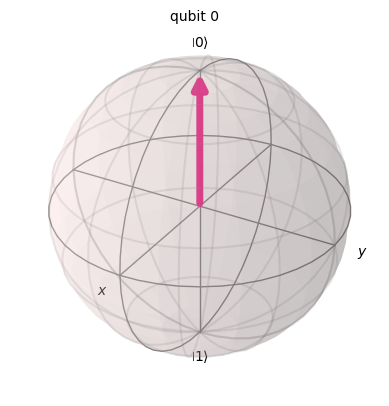

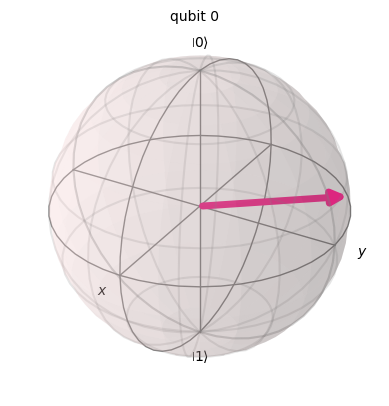

In [43]:
display(plot_bloch_multivector(u), plot_bloch_multivector(v))


In [14]:
# Let's measure the quantum states from state vector class and simulated
display(u.measure())
display(v.measure())
display(w.measure()) # You can see why it is not a valid qubit

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

ValueError: probabilities do not sum to 1

The outcome of measuring the vector `v` $1024$ times, which (with high probability) results in the outcome $0$ approximately $5$ out of every $9$ times (or about $518$ of the $1024$ trials) and the the outcome $1$ approximately $4$ out of every $9$ times (or about $506$ out of the $1024$ trials).

{'0': 518, '1': 506}

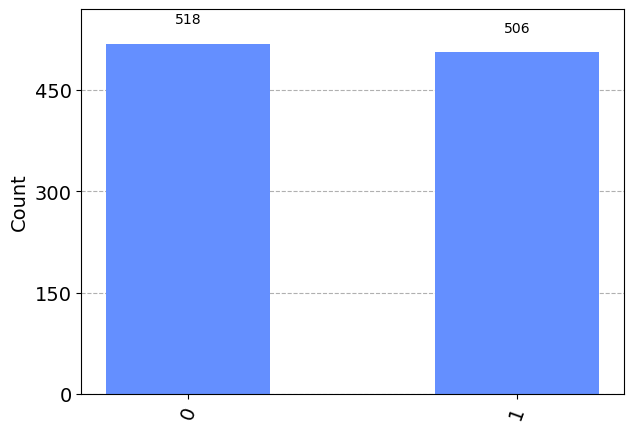

In [15]:
stats = u.sample_counts(1024)
display(stats)
plot_histogram(stats)

{'0': 553, '1': 471}

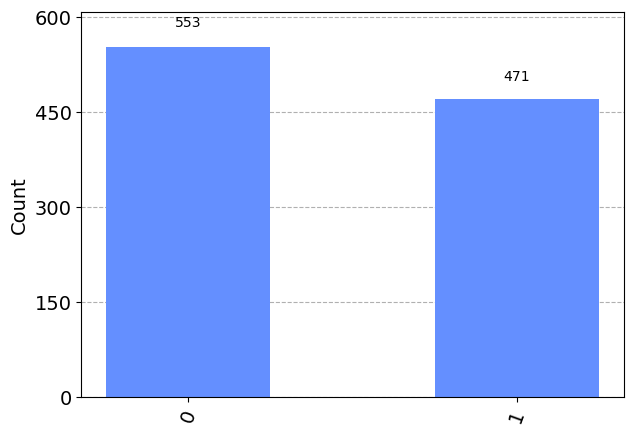

In [16]:
stats = v.sample_counts(1024)
display(stats)
plot_histogram(stats)

In [20]:
# Applying Unitary Operation on state vectors
X = Operator([[0,1],[1,0]])
Y = Operator([[0,-1.j],[1.j,0]])
Z = Operator([[1,0],[0,-1]])
H = Operator([[1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)]])
S = Operator([[1,0],[0,1.j]])
T = Operator([[1,0],[0,(1+1.j)/sqrt(2)]])
display(X, Y, Z, H, S, T)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 0.+0.j, -0.-1.j],
          [ 0.+1.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[1.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678+0.70710678j]],
         input_dims=(2,), output_dims=(2,))

In [44]:
# applying Operator X on state vector u
u_1 = u.evolve(X)
u_2 = u.evolve(Y)
u_3 = u.evolve(Z)
u_4 = u.evolve(H)
u_5 = u.evolve(S)
u_6 = u.evolve(T)
display(u_1.draw('latex'), u_2.draw('latex'), u_3.draw('latex'), u_4.draw('latex'), u_5.draw('latex'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

You can seen after applying Operators on $u = 1/2 * ∣0⟩+ 1/2 * ∣1⟩$

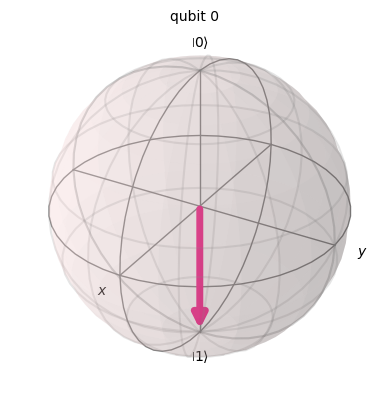

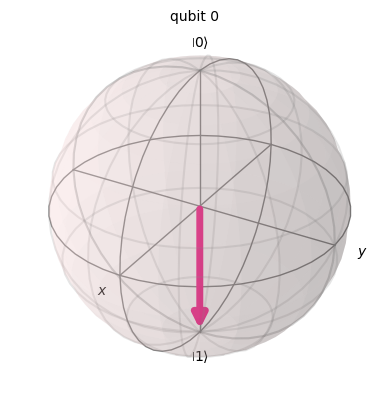

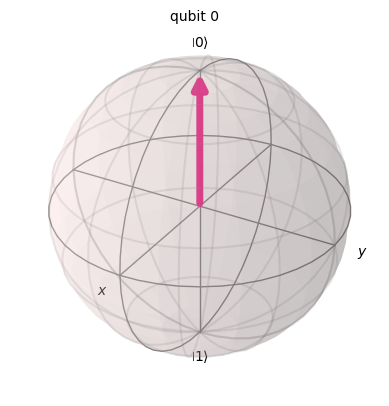

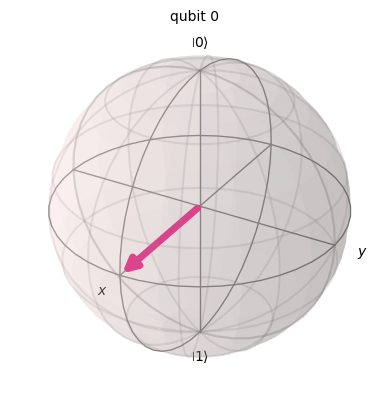

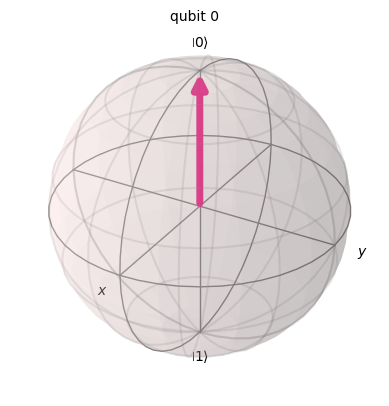

In [45]:
display(plot_bloch_multivector(u_1),
        plot_bloch_multivector(u_2),
        plot_bloch_multivector(u_3),
        plot_bloch_multivector(u_4),
        plot_bloch_multivector(u_5))

In [23]:
v_1 = v.evolve(H)
v_2 = v.evolve(T)
v_3 = v.evolve(H)
v_4 = v.evolve(T)
v_5 = v.evolve(Z)

display(v_1.draw('latex'), v_2.draw('latex'), v_3.draw('latex'), v_4.draw('latex'), v_5.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

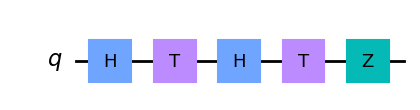

In [25]:
# Let's create a quantum circuits
# Thus, a sequence of unitary operation performed on a single qubit
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.z(0)
qc.draw(output="mpl")



In [26]:
display(qc.draw('latex'))

MissingOptionalLibraryError: "The 'pdflatex' library is required to use 'LaTeX circuit drawing'.  You will likely need to install a full LaTeX distribution for your system."

In [30]:
# Till now , we created out quantum circuit
# Now, we are going to apply operations sequencially on qubit
v_new = v.evolve(qc)
display(v_new.draw('latex'))

<IPython.core.display.Latex object>

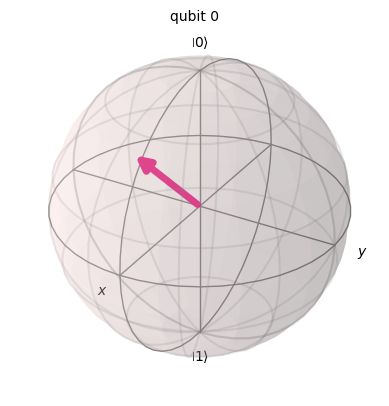

In [46]:
display(plot_bloch_multivector(v_new))

In [31]:
u_new = u.evolve(qc)
display(u_new.draw('latex'))

<IPython.core.display.Latex object>

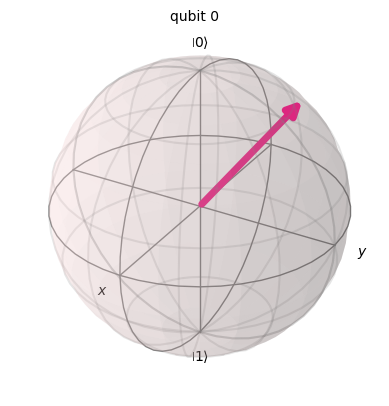

In [47]:
display(plot_bloch_multivector(u_new))

Let's simulate the our result of running the experiment like preparing the state $\vert 0 \rangle$, applying the sequence of operations represented by the circuit and measuring 1024 times

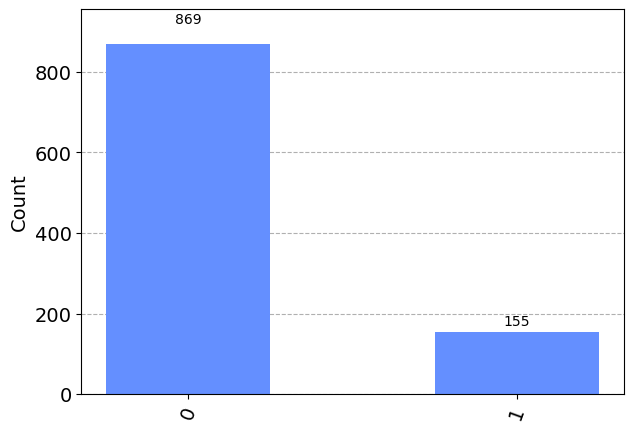

In [32]:
stats = u_new.sample_counts(1024)
plot_histogram(stats)

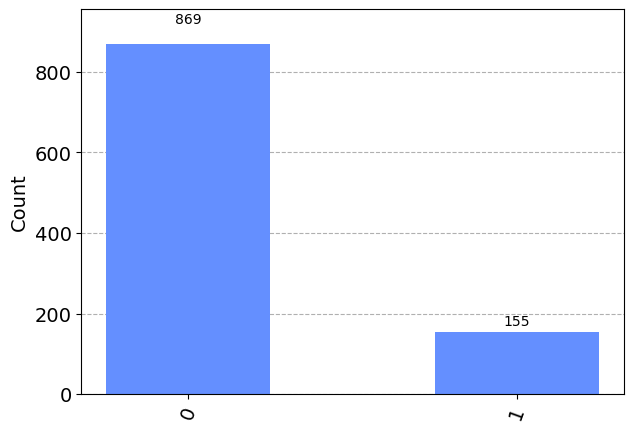

In [33]:
stats = v_new.sample_counts(1024)
plot_histogram(stats)

### Conclusion

### Reference
1. Qiskit Textbook

In [51]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright